# CAPSTONE PROJECT

First loading required libraries:

In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# About Dataset 

This dataset is about car accidents in Seattle area which is recorded by SDOT (Seattle Department of Transport).This project aims to understand the factors influencing the occurance and the severity of road traffic accidents in the Seattle area.Lets download the dataset.

# Load & read data from CSV file

In [35]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [36]:
df.shape

(194673, 38)

Original dataset contains 194673 rows and 38 columns. Such a large dataset requires too much time & memory while training and testing models. Therefore we are selecting 10 percent of rows (19467) & 38 columns of original dataset for further analysis.

In [37]:
#selecting sample of large dataset
df = df.sample(frac=0.10)

df.shape

(19467, 38)

In [38]:
df.head(15)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
191263,1,-122.344947,47.720482,215555,322745,324245,3795730,Matched,Block,NaN,...,Dry,NaN,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
92378,1,-122.337099,47.699596,101295,115232,115232,3376835,Matched,Block,NaN,...,Wet,Daylight,NaN,10305005.0,NaN,20,One car leaving parked position,0,0,N
73500,2,-122.283691,47.578873,80154,93283,93283,2894524,Matched,Block,NaN,...,Dry,Daylight,Y,8285035.0,NaN,45,Vehicle - Pedalcyclist,38078,0,N
193039,1,-122.316579,47.661292,217636,308828,310108,E876733,Matched,Intersection,27065.0,...,Wet,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
113931,2,-122.414782,47.573053,126084,140772,140772,3505161,Matched,Intersection,31797.0,...,Dry,Dark - Street Lights On,NaN,12366019.0,Y,10,Entering at angle,0,0,N
110373,1,-122.333899,47.601722,121881,136114,136114,3549330,Matched,Intersection,30356.0,...,Dry,Dark - Street Lights On,NaN,12278004.0,NaN,10,Entering at angle,0,0,N
95797,2,-122.338651,47.607332,105157,119984,119984,3561389,Matched,Block,NaN,...,Dry,Daylight,Y,11258012.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
87899,1,-122.359310,47.686940,96356,111305,111305,3562103,Matched,Block,NaN,...,Dry,Daylight,NaN,10341024.0,NaN,13,From same direction - both going straight - bo...,0,0,N
18789,1,-122.308864,47.612218,22981,36495,36495,C651537,Matched,Block,NaN,...,Dry,Daylight,NaN,5068037.0,NaN,20,One car leaving parked position,0,0,N
104222,2,-122.377329,47.686874,114738,129784,129784,3544922,Matched,Block,NaN,...,Dry,Dark - Street Lights On,NaN,11300018.0,NaN,50,Fixed object,0,0,N


In [39]:
#resetting index of selected dataset
df.reset_index(inplace=True, drop=True)
df.head(15)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.344947,47.720482,215555,322745,324245,3795730,Matched,Block,NaN,...,Dry,NaN,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
1,1,-122.337099,47.699596,101295,115232,115232,3376835,Matched,Block,NaN,...,Wet,Daylight,NaN,10305005.0,NaN,20,One car leaving parked position,0,0,N
2,2,-122.283691,47.578873,80154,93283,93283,2894524,Matched,Block,NaN,...,Dry,Daylight,Y,8285035.0,NaN,45,Vehicle - Pedalcyclist,38078,0,N
3,1,-122.316579,47.661292,217636,308828,310108,E876733,Matched,Intersection,27065.0,...,Wet,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,2,-122.414782,47.573053,126084,140772,140772,3505161,Matched,Intersection,31797.0,...,Dry,Dark - Street Lights On,NaN,12366019.0,Y,10,Entering at angle,0,0,N
5,1,-122.333899,47.601722,121881,136114,136114,3549330,Matched,Intersection,30356.0,...,Dry,Dark - Street Lights On,NaN,12278004.0,NaN,10,Entering at angle,0,0,N
6,2,-122.338651,47.607332,105157,119984,119984,3561389,Matched,Block,NaN,...,Dry,Daylight,Y,11258012.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
7,1,-122.359310,47.686940,96356,111305,111305,3562103,Matched,Block,NaN,...,Dry,Daylight,NaN,10341024.0,NaN,13,From same direction - both going straight - bo...,0,0,N
8,1,-122.308864,47.612218,22981,36495,36495,C651537,Matched,Block,NaN,...,Dry,Daylight,NaN,5068037.0,NaN,20,One car leaving parked position,0,0,N
9,2,-122.377329,47.686874,114738,129784,129784,3544922,Matched,Block,NaN,...,Dry,Dark - Street Lights On,NaN,11300018.0,NaN,50,Fixed object,0,0,N


In [40]:
#Check the types of data in the dataframe
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [41]:
print(df.loc[0,:])

SEVERITYCODE                                                      1
X                                                          -122.345
Y                                                           47.7205
OBJECTID                                                     215555
INCKEY                                                       322745
COLDETKEY                                                    324245
REPORTNO                                                    3795730
STATUS                                                      Matched
ADDRTYPE                                                      Block
INTKEY                                                          NaN
LOCATION             AURORA AVE N BETWEEN N 125TH ST AND N 127TH ST
EXCEPTRSNCODE                                                      
EXCEPTRSNDESC                                                   NaN
SEVERITYCODE.1                                                    1
SEVERITYDESC                         Property Da

In [42]:
#evaluating missing data
missing_data = df.isnull() 
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.

In [43]:
#count missing value in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    19467
Name: SEVERITYCODE, dtype: int64

X
False    18948
True       519
Name: X, dtype: int64

Y
False    18948
True       519
Name: Y, dtype: int64

OBJECTID
False    19467
Name: OBJECTID, dtype: int64

INCKEY
False    19467
Name: INCKEY, dtype: int64

COLDETKEY
False    19467
Name: COLDETKEY, dtype: int64

REPORTNO
False    19467
Name: REPORTNO, dtype: int64

STATUS
False    19467
Name: STATUS, dtype: int64

ADDRTYPE
False    19263
True       204
Name: ADDRTYPE, dtype: int64

INTKEY
True     12869
False     6598
Name: INTKEY, dtype: int64

LOCATION
False    19201
True       266
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     10973
False     8494
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     18889
False      578
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    19467
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    19467
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    18964
True       503
Name: COLLISIONTYPE, dtype: int

so we can summersize columns having null values as below


In [44]:
#Check where there are NaNs in the dataframe
print(df.isnull().sum(axis=0)) 


SEVERITYCODE          0
X                   519
Y                   519
OBJECTID              0
INCKEY                0
COLDETKEY             0
REPORTNO              0
STATUS                0
ADDRTYPE            204
INTKEY            12869
LOCATION            266
EXCEPTRSNCODE     10973
EXCEPTRSNDESC     18889
SEVERITYCODE.1        0
SEVERITYDESC          0
COLLISIONTYPE       503
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDATE               0
INCDTTM               0
JUNCTIONTYPE        648
SDOT_COLCODE          0
SDOT_COLDESC          0
INATTENTIONIND    16506
UNDERINFL           501
WEATHER             521
ROADCOND            517
LIGHTCOND           529
PEDROWNOTGRNT     18991
SDOTCOLNUM         7979
SPEEDING          18544
ST_COLCODE            2
ST_COLDESC          503
SEGLANEKEY            0
CROSSWALKKEY          0
HITPARKEDCAR          0
dtype: int64


 Based on the summary above, each column has 19467 rows of data, 19 columns containing missing data

# Data Cleaning

As target variable "severitycode" doesnot have any null or unknown values. now for data cleaning first we will drop unnecessary columns and columns having large number of missing data.

### Data Cleaning 1: Removing unnecessary columns

In [45]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [46]:
df.drop(['OBJECTID','COLDETKEY','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','INCDATE','SDOTCOLNUM','ST_COLCODE','ST_COLDESC'], axis=1, inplace=True)


In [47]:
df.head(5)

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.344947,47.720482,322745,Block,AURORA AVE N BETWEEN N 125TH ST AND N 127TH ST,Property Damage Only Collision,Rear Ended,2,0,...,Y,N,Clear,Dry,NaN,NaN,NaN,0,0,N
1,1,-122.337099,47.699596,115232,Block,N 97TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,Property Damage Only Collision,Parked Car,3,0,...,NaN,N,Raining,Wet,Daylight,NaN,NaN,0,0,N
2,2,-122.283691,47.578873,93283,Block,LAKE WASHINGTON BLVD S BETWEEN LAKE PARK DR S ...,Injury Collision,Cycles,3,0,...,NaN,0,Clear,Dry,Daylight,Y,NaN,38078,0,N
3,1,-122.316579,47.661292,308828,Intersection,11TH AVE NE AND NE 45TH ST,Property Damage Only Collision,Left Turn,3,0,...,NaN,N,Raining,Wet,Daylight,NaN,NaN,0,0,N
4,2,-122.414782,47.573053,140772,Intersection,64TH AVE SW AND BEACH DR SW,Injury Collision,Angles,2,0,...,NaN,N,Clear,Dry,Dark - Street Lights On,NaN,Y,0,0,N


### Data Cleaning 2:Removing rows where key features are missing

In [48]:
#count missing value in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    19467
Name: SEVERITYCODE, dtype: int64

X
False    18948
True       519
Name: X, dtype: int64

Y
False    18948
True       519
Name: Y, dtype: int64

OBJECTID
False    19467
Name: OBJECTID, dtype: int64

INCKEY
False    19467
Name: INCKEY, dtype: int64

COLDETKEY
False    19467
Name: COLDETKEY, dtype: int64

REPORTNO
False    19467
Name: REPORTNO, dtype: int64

STATUS
False    19467
Name: STATUS, dtype: int64

ADDRTYPE
False    19263
True       204
Name: ADDRTYPE, dtype: int64

INTKEY
True     12869
False     6598
Name: INTKEY, dtype: int64

LOCATION
False    19201
True       266
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     10973
False     8494
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     18889
False      578
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    19467
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    19467
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    18964
True       503
Name: COLLISIONTYPE, dtype: int

In [49]:
print(df.isnull().sum(axis=0))

SEVERITYCODE          0
X                   519
Y                   519
INCKEY                0
ADDRTYPE            204
LOCATION            266
SEVERITYDESC          0
COLLISIONTYPE       503
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDTTM               0
JUNCTIONTYPE        648
SDOT_COLCODE          0
SDOT_COLDESC          0
INATTENTIONIND    16506
UNDERINFL           501
WEATHER             521
ROADCOND            517
LIGHTCOND           529
PEDROWNOTGRNT     18991
SPEEDING          18544
SEGLANEKEY            0
CROSSWALKKEY          0
HITPARKEDCAR          0
dtype: int64


In [50]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [51]:
print(df.isnull().sum(axis=0))

SEVERITYCODE          0
X                   500
Y                   500
INCKEY                0
ADDRTYPE            191
LOCATION            252
SEVERITYDESC          0
COLLISIONTYPE         2
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDTTM               0
JUNCTIONTYPE        629
SDOT_COLCODE          0
SDOT_COLDESC          0
INATTENTIONIND    15975
UNDERINFL             0
WEATHER               0
ROADCOND              0
LIGHTCOND             0
PEDROWNOTGRNT     18451
SPEEDING          18004
SEGLANEKEY            0
CROSSWALKKEY          0
HITPARKEDCAR          0
dtype: int64


In [52]:
df.shape

(18926, 26)

## Data Cleaning 3:Convert Categorical features to numerical values

In [53]:
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)

df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

In [54]:
print(df.isnull().sum(axis=0))

SEVERITYCODE        0
X                 500
Y                 500
INCKEY              0
ADDRTYPE          191
LOCATION          252
SEVERITYDESC        0
COLLISIONTYPE       2
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDTTM             0
JUNCTIONTYPE      629
SDOT_COLCODE        0
SDOT_COLDESC        0
INATTENTIONIND      0
UNDERINFL           0
WEATHER             0
ROADCOND            0
LIGHTCOND           0
PEDROWNOTGRNT       0
SPEEDING            0
SEGLANEKEY          0
CROSSWALKKEY        0
HITPARKEDCAR        0
dtype: int64


# Data visualization and pre-processing

In [55]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              8624
At Intersection (intersection related)               6229
Mid-Block (but intersection related)                 2209
Driveway Junction                                    1041
At Intersection (but not related to intersection)     180
Ramp Junction                                          14
Name: JUNCTIONTYPE, dtype: int64

In [56]:
#Metadata for the charts that follow:
#1 - Weather conditions
print('Frequency of weather types:')
print(df["WEATHER"].value_counts())
print(len(df["WEATHER"]))

Frequency of weather types:
Clear                       11139
Raining                      3265
Overcast                     2762
Unknown                      1527
Snowing                        80
Other                          74
Fog/Smog/Smoke                 57
Blowing Sand/Dirt               9
Sleet/Hail/Freezing Rain        9
Severe Crosswind                3
Partly Cloudy                   1
Name: WEATHER, dtype: int64
18926


In [57]:
#2 - Road conditions
print('Frequency of rifferent road conditions:')
print(df["ROADCOND"].value_counts())

Frequency of rifferent road conditions:
Dry               12528
Wet                4627
Unknown            1525
Ice                 128
Snow/Slush           75
Other                13
Sand/Mud/Dirt        11
Oil                  10
Standing Water        9
Name: ROADCOND, dtype: int64


In [58]:
#3 - Light conditions
print('Frequency of different light conditions:')
print(df["LIGHTCOND"].value_counts())

Frequency of different light conditions:
Daylight                    11787
Dark - Street Lights On      4707
Unknown                      1316
Dusk                          575
Dawn                          255
Dark - No Street Lights       151
Dark - Street Lights Off      106
Other                          27
Dark - Unknown Lighting         2
Name: LIGHTCOND, dtype: int64


In [59]:
#3 - Locations
print('Frequency of different locations:')
print(df["LOCATION"].value_counts())


Frequency of different locations:
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   30
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          27
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          26
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                25
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          23
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N                                              21
RAINIER AVE S BETWEEN S CLOVERDALE ST AND S HENDERSON ST                                20
6TH AVE AND JAMES ST                                                                    19
12TH AVE AND E MADISON ST                                                               19
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              18
N NORTHGATE WAY BETWEEN CORLISS AVE N AND 1ST AVE NE    

In [60]:
#Import Matplotlib and prepare inline plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

#Set up gpplot style
mpl.style.use('ggplot')

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.0.2


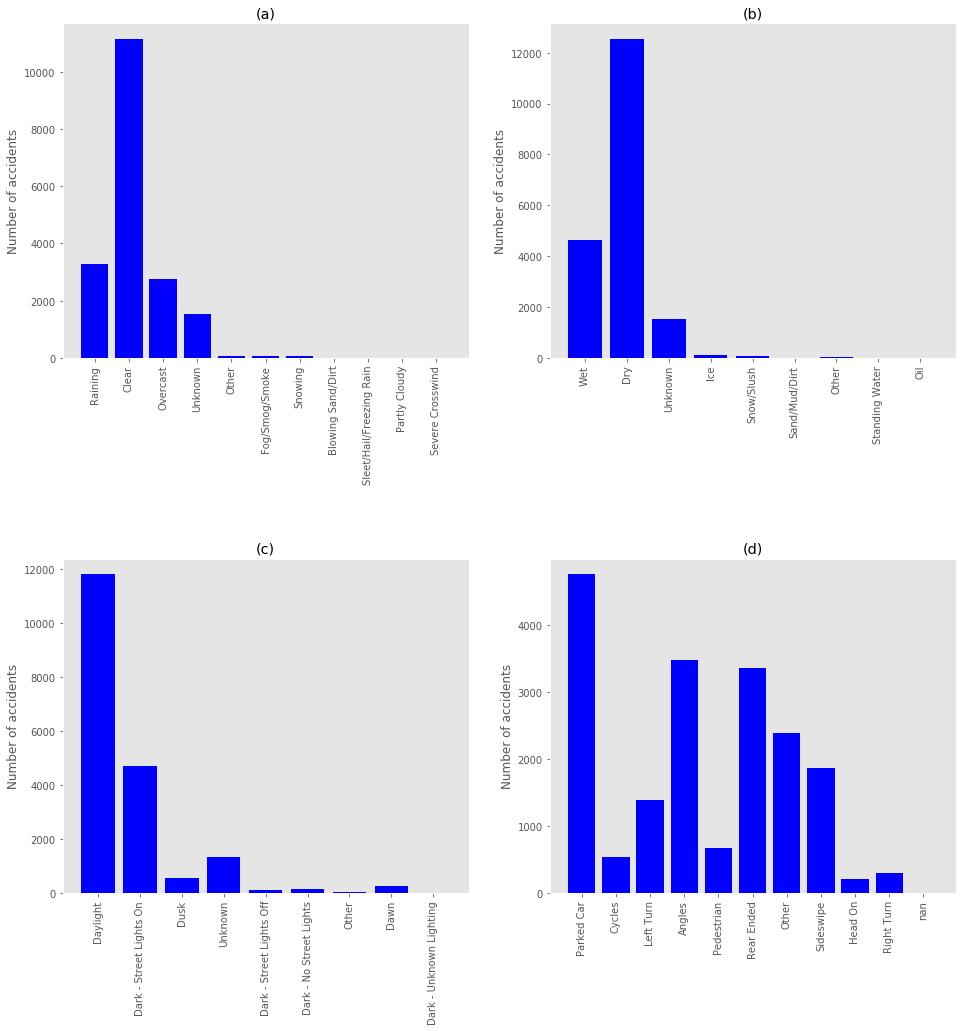

In [61]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Weather conditions
plt.subplot(2,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Road conditions
plt.subplot(2,2,2)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#3 - Light conditions
plt.subplot(2,2,3)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(c)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#4 - ADDRTYPE
plt.subplot(2,2,4)
freqs = Counter(df["COLLISIONTYPE"])
xvals = range(len(freqs.values()))
plt.title('(d)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.subplots_adjust(hspace=0.6)

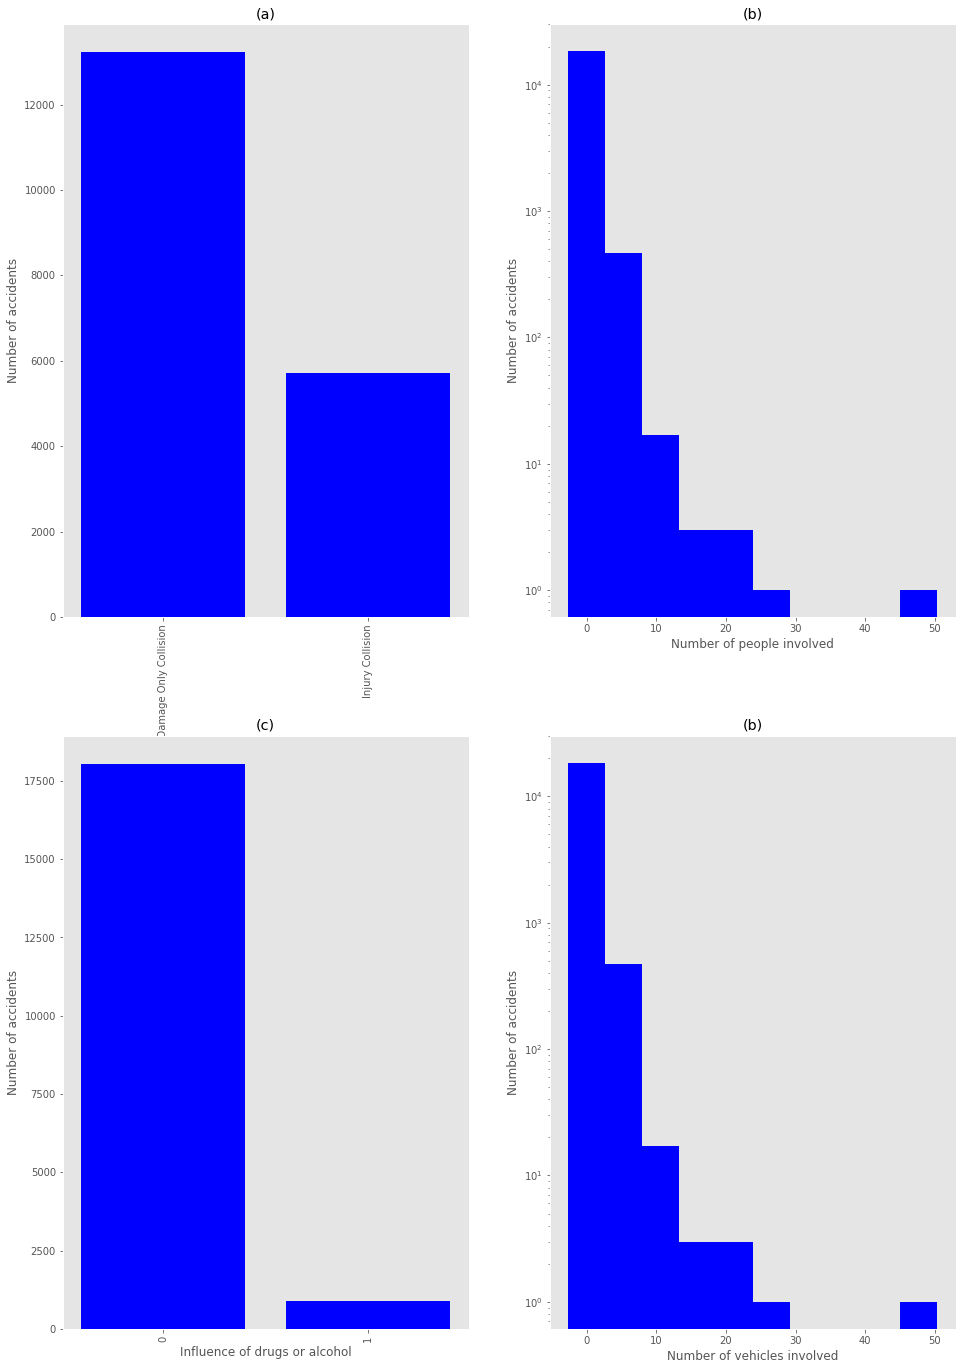

In [65]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,24)
#1 - Accident severities
plt.subplot(2,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title("Distribution of accident outcomes")
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
#plt.yscale('log')

#2 - Number of people involved
plt.subplot(2,2,2)
freqs = Counter(df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people involved")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.hist(df["PERSONCOUNT"], align='left', color='blue')
plt.yscale('log')

#2 - Number of people involved
plt.subplot(2,2,3)
freqs = Counter(df["UNDERINFL"])
xvals = range(len(freqs.values()))
plt.title('(c)')
plt.xlabel("Influence of drugs or alcohol")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Number of people involved
plt.subplot(2,2,4)
freqs = Counter(df["VEHCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of vehicles involved")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.hist(df["PERSONCOUNT"], align='left', color='blue')
plt.yscale('log')

# One Hot Encoding

In [66]:
df.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize=True)

WEATHER                   SEVERITYDESC                  
Blowing Sand/Dirt         Property Damage Only Collision    0.555556
                          Injury Collision                  0.444444
Clear                     Property Damage Only Collision    0.675105
                          Injury Collision                  0.324895
Fog/Smog/Smoke            Property Damage Only Collision    0.684211
                          Injury Collision                  0.315789
Other                     Property Damage Only Collision    0.810811
                          Injury Collision                  0.189189
Overcast                  Property Damage Only Collision    0.686821
                          Injury Collision                  0.313179
Partly Cloudy             Property Damage Only Collision    1.000000
Raining                   Property Damage Only Collision    0.666462
                          Injury Collision                  0.333538
Severe Crosswind          Property Damage Only

# Use of one hot encoding technique to convert categorical varables to binary variables and append them to the  Data Frame

In [67]:
df.head(5)

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.337099,47.699596,115232,Block,N 97TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,Property Damage Only Collision,Parked Car,3,0,...,0,0,Raining,Wet,Daylight,0,0,0,0,0
1,2,-122.283691,47.578873,93283,Block,LAKE WASHINGTON BLVD S BETWEEN LAKE PARK DR S ...,Injury Collision,Cycles,3,0,...,0,0,Clear,Dry,Daylight,1,0,38078,0,0
2,1,-122.316579,47.661292,308828,Intersection,11TH AVE NE AND NE 45TH ST,Property Damage Only Collision,Left Turn,3,0,...,0,0,Raining,Wet,Daylight,0,0,0,0,0
3,2,-122.414782,47.573053,140772,Intersection,64TH AVE SW AND BEACH DR SW,Injury Collision,Angles,2,0,...,0,0,Clear,Dry,Dark - Street Lights On,0,1,0,0,0
4,1,-122.333899,47.601722,136114,Intersection,JAMES ST AND YESLER WAY,Property Damage Only Collision,Angles,2,0,...,0,0,Clear,Dry,Dark - Street Lights On,0,0,0,0,0


In [68]:
df = pd.concat([df,pd.get_dummies(df['WEATHER'])], axis=1)
df.rename(columns={"Other": "Other weather"}, inplace=True)
df.head()


,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,Clear,Fog/Smog/Smoke,Other weather,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,1,-122.337099,47.699596,115232,Block,N 97TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,Property Damage Only Collision,Parked Car,3,0,...,0,0,0,0,0,1,0,0,0,0
1,2,-122.283691,47.578873,93283,Block,LAKE WASHINGTON BLVD S BETWEEN LAKE PARK DR S ...,Injury Collision,Cycles,3,0,...,1,0,0,0,0,0,0,0,0,0
2,1,-122.316579,47.661292,308828,Intersection,11TH AVE NE AND NE 45TH ST,Property Damage Only Collision,Left Turn,3,0,...,0,0,0,0,0,1,0,0,0,0
3,2,-122.414782,47.573053,140772,Intersection,64TH AVE SW AND BEACH DR SW,Injury Collision,Angles,2,0,...,1,0,0,0,0,0,0,0,0,0
4,1,-122.333899,47.601722,136114,Intersection,JAMES ST AND YESLER WAY,Property Damage Only Collision,Angles,2,0,...,1,0,0,0,0,0,0,0,0,0


In [69]:
df.drop(['Unknown'], axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['ROADCOND'])], axis=1)
df.rename(columns={"Other": "Other ROADCOND"}, inplace=True)
df.head()

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,Snowing,Dry,Ice,Oil,Other ROADCOND,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,1,-122.337099,47.699596,115232,Block,N 97TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,Property Damage Only Collision,Parked Car,3,0,...,0,0,0,0,0,0,0,0,0,1
1,2,-122.283691,47.578873,93283,Block,LAKE WASHINGTON BLVD S BETWEEN LAKE PARK DR S ...,Injury Collision,Cycles,3,0,...,0,1,0,0,0,0,0,0,0,0
2,1,-122.316579,47.661292,308828,Intersection,11TH AVE NE AND NE 45TH ST,Property Damage Only Collision,Left Turn,3,0,...,0,0,0,0,0,0,0,0,0,1
3,2,-122.414782,47.573053,140772,Intersection,64TH AVE SW AND BEACH DR SW,Injury Collision,Angles,2,0,...,0,1,0,0,0,0,0,0,0,0
4,1,-122.333899,47.601722,136114,Intersection,JAMES ST AND YESLER WAY,Property Damage Only Collision,Angles,2,0,...,0,1,0,0,0,0,0,0,0,0


In [70]:
df.drop(['Unknown'], axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['LIGHTCOND'])], axis=1)
df.rename(columns={"Other": "Other LIGHTCOND"}, inplace=True)
df.head()

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other LIGHTCOND,Unknown
0,1,-122.337099,47.699596,115232,Block,N 97TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,Property Damage Only Collision,Parked Car,3,0,...,1,0,0,0,0,0,1,0,0,0
1,2,-122.283691,47.578873,93283,Block,LAKE WASHINGTON BLVD S BETWEEN LAKE PARK DR S ...,Injury Collision,Cycles,3,0,...,0,0,0,0,0,0,1,0,0,0
2,1,-122.316579,47.661292,308828,Intersection,11TH AVE NE AND NE 45TH ST,Property Damage Only Collision,Left Turn,3,0,...,1,0,0,0,0,0,1,0,0,0
3,2,-122.414782,47.573053,140772,Intersection,64TH AVE SW AND BEACH DR SW,Injury Collision,Angles,2,0,...,0,0,0,1,0,0,0,0,0,0
4,1,-122.333899,47.601722,136114,Intersection,JAMES ST AND YESLER WAY,Property Damage Only Collision,Angles,2,0,...,0,0,0,1,0,0,0,0,0,0


In [71]:
df.drop(['Unknown'], axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['ADDRTYPE'])], axis=1)
df.rename(columns={"Other": "Other ADDRTYPE"}, inplace=True)
df.head()

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other LIGHTCOND,Alley,Block,Intersection
0,1,-122.337099,47.699596,115232,Block,N 97TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,Property Damage Only Collision,Parked Car,3,0,...,0,0,0,0,1,0,0,0,1,0
1,2,-122.283691,47.578873,93283,Block,LAKE WASHINGTON BLVD S BETWEEN LAKE PARK DR S ...,Injury Collision,Cycles,3,0,...,0,0,0,0,1,0,0,0,1,0
2,1,-122.316579,47.661292,308828,Intersection,11TH AVE NE AND NE 45TH ST,Property Damage Only Collision,Left Turn,3,0,...,0,0,0,0,1,0,0,0,0,1
3,2,-122.414782,47.573053,140772,Intersection,64TH AVE SW AND BEACH DR SW,Injury Collision,Angles,2,0,...,0,1,0,0,0,0,0,0,0,1
4,1,-122.333899,47.601722,136114,Intersection,JAMES ST AND YESLER WAY,Property Damage Only Collision,Angles,2,0,...,0,1,0,0,0,0,0,0,0,1


In [72]:
df.shape

(18926, 55)

In [73]:
print(df.isnull().sum(axis=0))

SEVERITYCODE                  0
X                           500
Y                           500
INCKEY                        0
ADDRTYPE                    191
LOCATION                    252
SEVERITYDESC                  0
COLLISIONTYPE                 2
PERSONCOUNT                   0
PEDCOUNT                      0
PEDCYLCOUNT                   0
VEHCOUNT                      0
INCDTTM                       0
JUNCTIONTYPE                629
SDOT_COLCODE                  0
SDOT_COLDESC                  0
INATTENTIONIND                0
UNDERINFL                     0
WEATHER                       0
ROADCOND                      0
LIGHTCOND                     0
PEDROWNOTGRNT                 0
SPEEDING                      0
SEGLANEKEY                    0
CROSSWALKKEY                  0
HITPARKEDCAR                  0
Blowing Sand/Dirt             0
Clear                         0
Fog/Smog/Smoke                0
Other weather                 0
Overcast                      0
Partly C

In [74]:
df.dtypes

SEVERITYCODE                  int64
X                           float64
Y                           float64
INCKEY                        int64
ADDRTYPE                     object
LOCATION                     object
SEVERITYDESC                 object
COLLISIONTYPE                object
PERSONCOUNT                   int64
PEDCOUNT                      int64
PEDCYLCOUNT                   int64
VEHCOUNT                      int64
INCDTTM                      object
JUNCTIONTYPE                 object
SDOT_COLCODE                  int64
SDOT_COLDESC                 object
INATTENTIONIND                int64
UNDERINFL                     int64
WEATHER                      object
ROADCOND                     object
LIGHTCOND                    object
PEDROWNOTGRNT                 int64
SPEEDING                      int64
SEGLANEKEY                    int64
CROSSWALKKEY                  int64
HITPARKEDCAR                  int64
Blowing Sand/Dirt             uint8
Clear                       

# Balancing the data


Histogram of SEVERITYCODE shows that dataset is highly imbalanced.If we train models to predict severity using this dataset where majority of accidents have one perticular outcome (severitycode =1) then it is likely to have biased model. To avoid this problem we will use  undersampling technique to balace dataset.

In [75]:
df['SEVERITYCODE'].value_counts()

1    13221
2     5705
Name: SEVERITYCODE, dtype: int64

In [76]:
min_len=len(df[df['SEVERITYCODE']==2])
print(min_len)

5705


In [77]:
maj_indices=df[df['SEVERITYCODE']==1].index
print(maj_indices)
print (type(maj_indices))

Int64Index([    0,     2,     4,     6,     7,     9,    10,    11,    12,
               14,
            ...
            18915, 18916, 18917, 18918, 18919, 18920, 18921, 18922, 18923,
            18925],
           dtype='int64', length=13221)
<class 'pandas.core.indexes.numeric.Int64Index'>


In [78]:
maj_indices_array = np.array(maj_indices)
print(maj_indices_array)
print (type(maj_indices_array))


[    0     2     4 ... 18922 18923 18925]
<class 'numpy.ndarray'>


In [79]:
random_maj_indices=np.random.choice(maj_indices,
                                   min_len,
                                   replace=False)
print(len(random_maj_indices))

5705


In [80]:
min_indices=df[df['SEVERITYCODE']==2].index
print(min_indices)

Int64Index([    1,     3,     5,     8,    13,    18,    19,    24,    25,
               28,
            ...
            18885, 18886, 18894, 18896, 18900, 18905, 18906, 18909, 18914,
            18924],
           dtype='int64', length=5705)


In [81]:
min_indices_array = np.array(min_indices)
print(min_indices_array)
print (type(min_indices_array))

[    1     3     5 ... 18909 18914 18924]
<class 'numpy.ndarray'>


In [82]:
under_sample_indices=np.concatenate([min_indices,random_maj_indices])
df_resampled = df.loc[under_sample_indices]
df_resampled.shape

(11410, 55)

In [83]:
df_resampled.head(5)

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other LIGHTCOND,Alley,Block,Intersection
1,2,-122.283691,47.578873,93283,Block,LAKE WASHINGTON BLVD S BETWEEN LAKE PARK DR S ...,Injury Collision,Cycles,3,0,...,0,0,0,0,1,0,0,0,1,0
3,2,-122.414782,47.573053,140772,Intersection,64TH AVE SW AND BEACH DR SW,Injury Collision,Angles,2,0,...,0,1,0,0,0,0,0,0,0,1
5,2,-122.338651,47.607332,119984,Block,1ST AVE BETWEEN UNIVERSITY ST AND UNION ST,Injury Collision,Pedestrian,2,1,...,0,0,0,0,1,0,0,0,1,0
8,2,-122.377329,47.686874,129784,Block,NW 80TH ST BETWEEN 15TH AVE NW AND 16TH AVE NW,Injury Collision,Other,1,0,...,0,1,0,0,0,0,0,0,1,0
13,2,-122.316579,47.661292,53485,Intersection,11TH AVE NE AND NE 45TH ST,Injury Collision,Angles,2,0,...,0,1,0,0,0,0,0,0,0,1


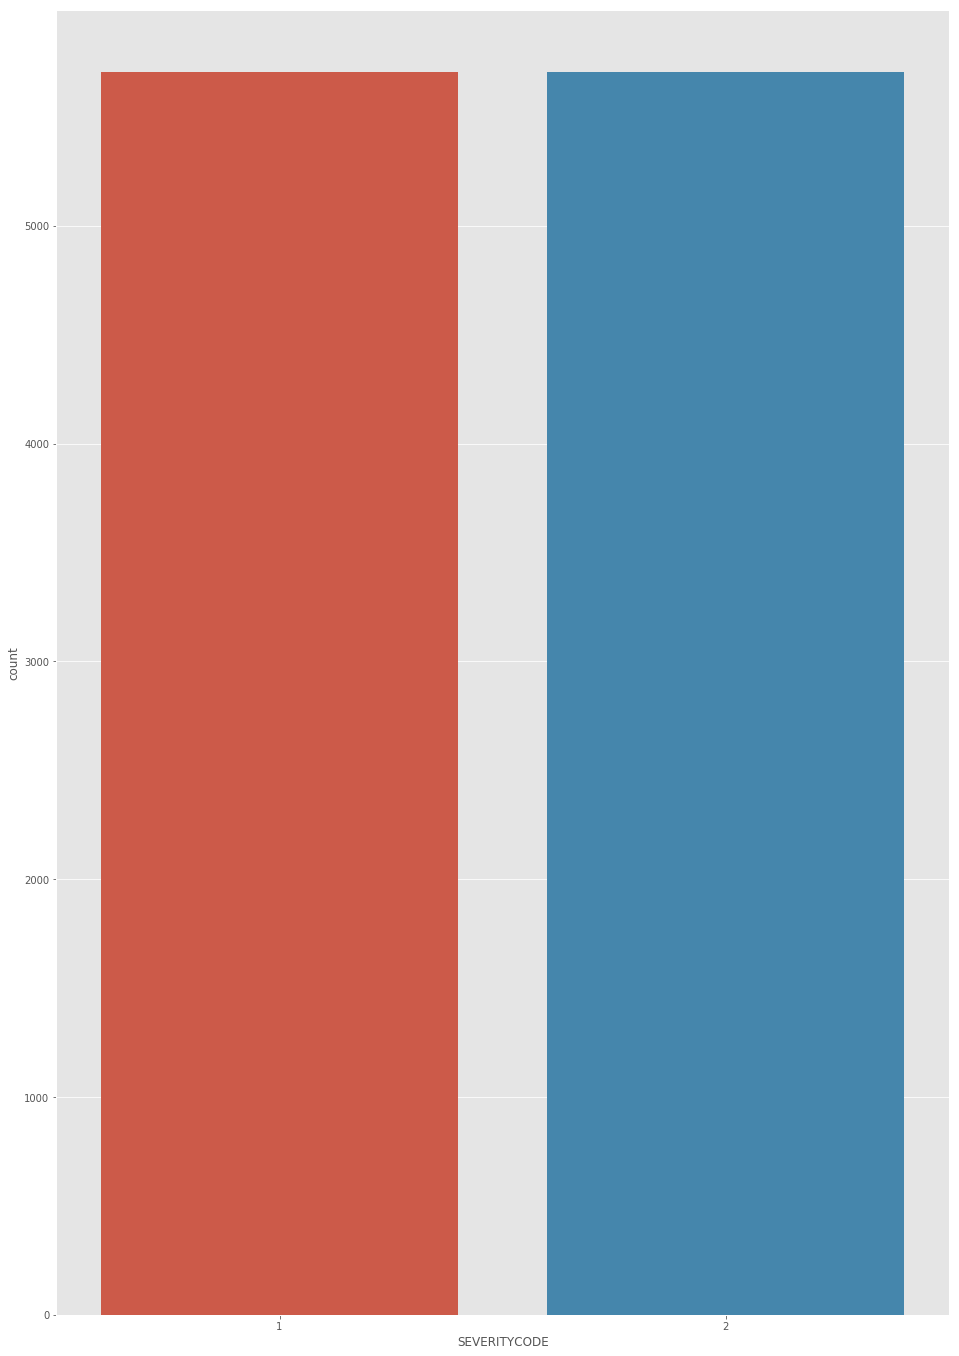

In [84]:
import seaborn as sns
sns.countplot(x='SEVERITYCODE',data=df_resampled)

Let's make some plots to see how the distributions of some key features compare before and after resampling the data:

([<matplotlib.axis.XTick at 0x7fec105eb320>,
 <a list of 2 Text xticklabel objects>)

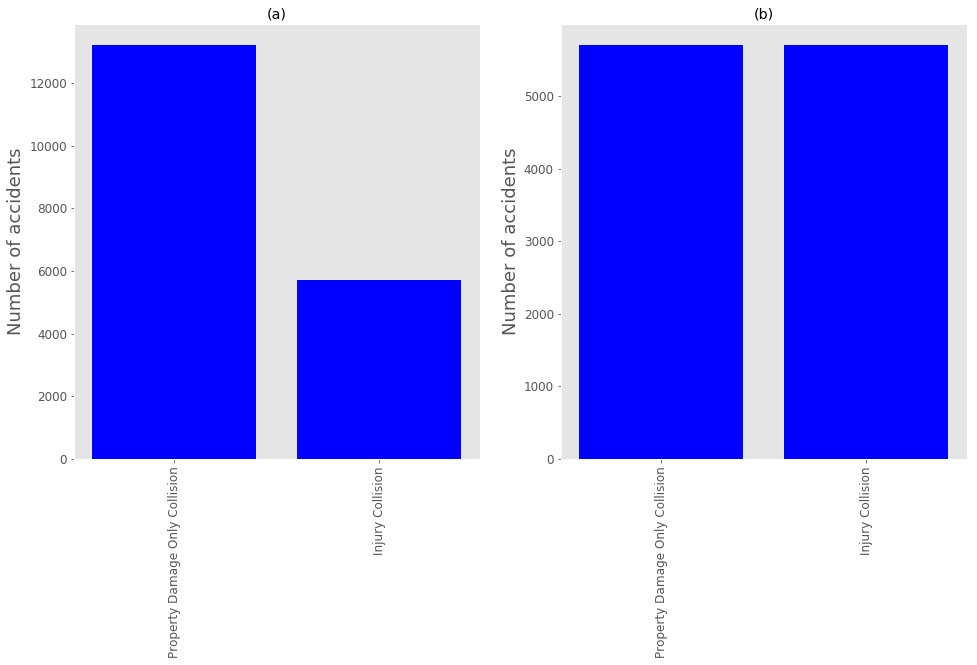

In [87]:
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

#Accident outcomes before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Accident severities (original)
plt.subplot(1,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Accident severities (normalised)
plt.subplot(1,2,2)
freqs = Counter(df_resampled["SEVERITYCODE"])
xvals = range(len(freqs.values()))
labels = ['Property Damage Only Collision', 'Injury Collision']
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, labels, rotation='vertical')


([<matplotlib.axis.XTick at 0x7febfa612a58>,
 <a list of 10 Text xticklabel objects>)

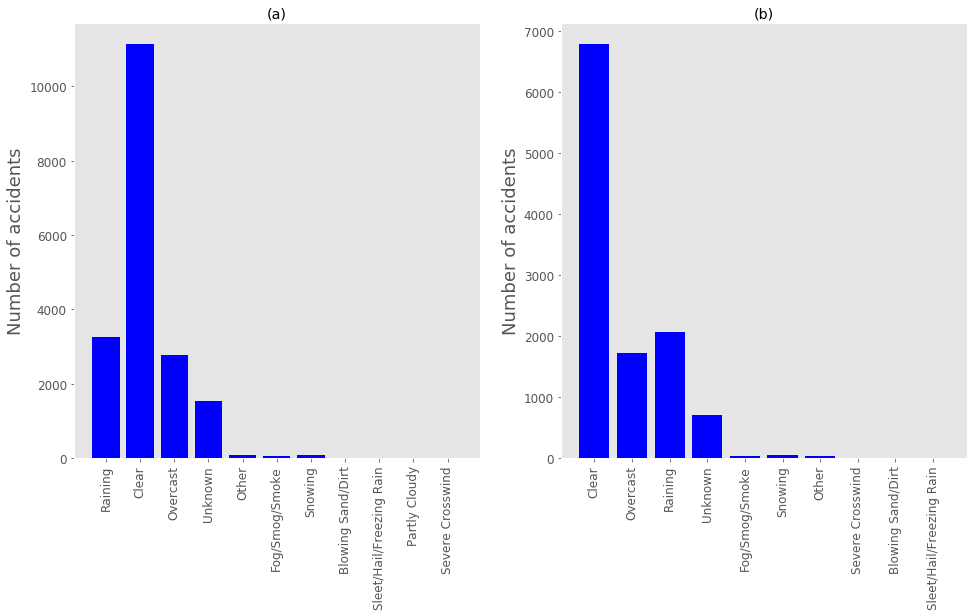

In [88]:
#Weather before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Weather (original)
plt.subplot(1,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Weather (normalised)
plt.subplot(1,2,2)
freqs = Counter(df_resampled["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')



([<matplotlib.axis.XTick at 0x7febf1192080>,
 <a list of 9 Text xticklabel objects>)

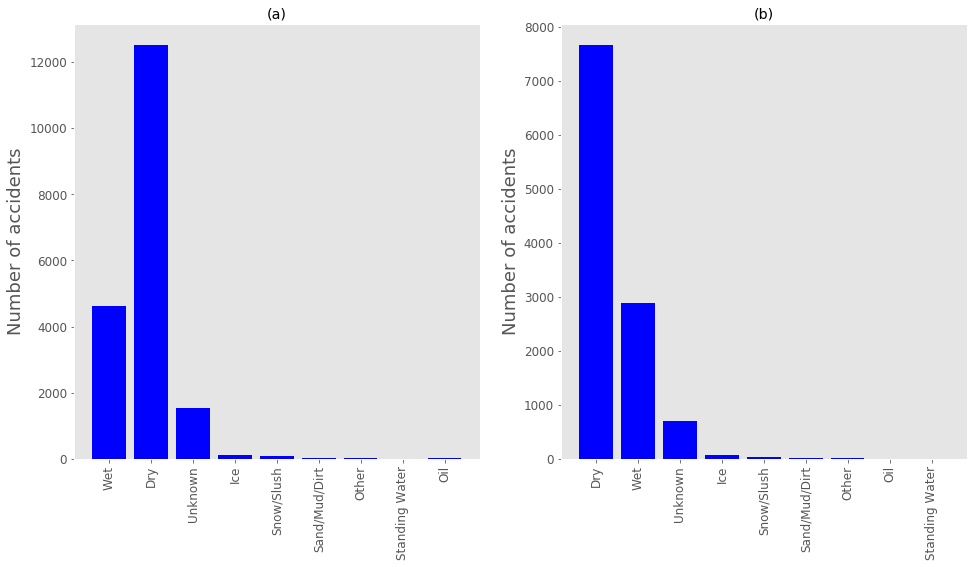

In [89]:
#Road conditions before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Roadcconditions (original)
plt.subplot(1,2,1)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Road conditions (normalised)
plt.subplot(1,2,2)
freqs = Counter(df_resampled["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')


([<matplotlib.axis.XTick at 0x7febea234cc0>,
 <a list of 9 Text xticklabel objects>)

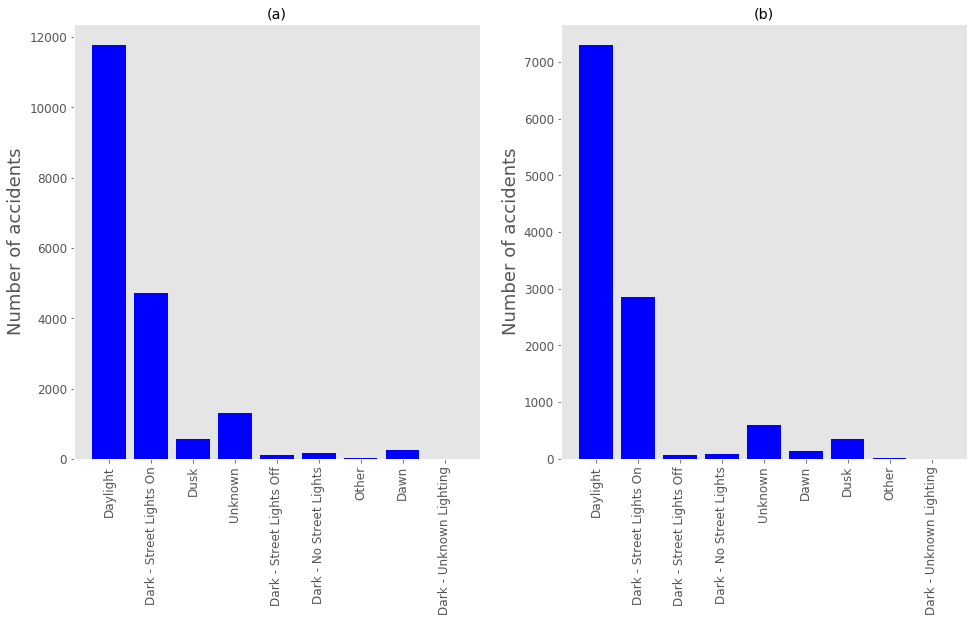

In [90]:

#Light conditions before/after
plt.rcParams["figure.figsize"] = (16,8)

#1 - Light conditions (original)
plt.subplot(1,2,1)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Light conditions (normalised)
plt.subplot(1,2,2)
freqs = Counter(df_resampled["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents", size=18)
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

In [91]:
df_resampled.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'INCKEY', 'ADDRTYPE', 'LOCATION',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'Blowing Sand/Dirt',
       'Clear', 'Fog/Smog/Smoke', 'Other weather', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil',
       'Other ROADCOND', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water',
       'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Other LIGHTCOND', 'Alley', 'Block',
       'Intersection'], dtype=object)

### Feature selection

In [92]:
Feature = df_resampled[['PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','UNDERINFL','SPEEDING','Blowing Sand/Dirt',
       'Clear', 'Fog/Smog/Smoke', 'Other weather', 'Overcast',
        'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil',
       'Other ROADCOND', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water',
       'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Other LIGHTCOND', 'Alley', 'Block','Intersection']]
Feature.head(5)

,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other weather,Overcast,...,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other LIGHTCOND,Alley,Block,Intersection
1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,2,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
8,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
13,0,0,2,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [93]:
Feature.shape

(11410, 33)

In [94]:
print(Feature.isnull().sum(axis=0))

PEDCOUNT                    0
PEDCYLCOUNT                 0
VEHCOUNT                    0
UNDERINFL                   0
SPEEDING                    0
Blowing Sand/Dirt           0
Clear                       0
Fog/Smog/Smoke              0
Other weather               0
Overcast                    0
Raining                     0
Severe Crosswind            0
Sleet/Hail/Freezing Rain    0
Snowing                     0
Dry                         0
Ice                         0
Oil                         0
Other ROADCOND              0
Sand/Mud/Dirt               0
Snow/Slush                  0
Standing Water              0
Wet                         0
Dark - No Street Lights     0
Dark - Street Lights Off    0
Dark - Street Lights On     0
Dark - Unknown Lighting     0
Dawn                        0
Daylight                    0
Dusk                        0
Other LIGHTCOND             0
Alley                       0
Block                       0
Intersection                0
dtype: int

In [95]:
Feature.dtypes

PEDCOUNT                    int64
PEDCYLCOUNT                 int64
VEHCOUNT                    int64
UNDERINFL                   int64
SPEEDING                    int64
Blowing Sand/Dirt           uint8
Clear                       uint8
Fog/Smog/Smoke              uint8
Other weather               uint8
Overcast                    uint8
Raining                     uint8
Severe Crosswind            uint8
Sleet/Hail/Freezing Rain    uint8
Snowing                     uint8
Dry                         uint8
Ice                         uint8
Oil                         uint8
Other ROADCOND              uint8
Sand/Mud/Dirt               uint8
Snow/Slush                  uint8
Standing Water              uint8
Wet                         uint8
Dark - No Street Lights     uint8
Dark - Street Lights Off    uint8
Dark - Street Lights On     uint8
Dark - Unknown Lighting     uint8
Dawn                        uint8
Daylight                    uint8
Dusk                        uint8
Other LIGHTCON

### Normalise the data

In [96]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(Feature).transform(Feature)

X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-0.24541078,  4.59485087, -1.56589277, -0.23078817, -0.23724644,
        -0.0209381 ,  0.82622193, -0.05466945, -0.05703788, -0.42203137,
        -0.46980052, -0.01324068, -0.02477647, -0.06292476,  0.69815482,
        -0.08079527, -0.01621716, -0.03244713, -0.02477647, -0.05931298,
        -0.0209381 , -0.58295017, -0.090159  , -0.07685523, -0.57741774,
        -0.00936216, -0.11185795,  0.74991441, -0.17710396, -0.03628177,
        -0.05047877,  0.80728444, -0.78874655],
       [-0.24541078, -0.21410606,  0.08676069, -0.23078817,  4.21502638,
        -0.0209381 ,  0.82622193, -0.05466945, -0.05703788, -0.42203137,
        -0.46980052, -0.01324068, -0.02477647, -0.06292476,  0.69815482,
        -0.08079527, -0.01621716, -0.03244713, -0.02477647, -0.05931298,
        -0.0209381 , -0.58295017, -0.090159  , -0.07685523,  1.73184843,
        -0.00936216, -0.11185795, -1.3334855 , -0.17710396, -0.03628177,
        -0.05047877, -1.23872077,  1.26783438],
       [ 3.75478495, -0.2141

In [97]:
Y = df_resampled['SEVERITYCODE'].values
Y[0:5]

array([2, 2, 2, 2, 2])

### Split in to testing/training subsets

In [98]:
# We split X and Y into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (7987, 33) (7987,)
Test set: (3423, 33) (3423,)


# Classification

We now finally have a clean, balanced and standardised dataset for the Seattle area. Categorical variables have been converted to numerical variables using standard data processing techniques. We are finally ready to begin building and testing models for predicting SEVERITYCODE from our chosen feature set.

The four models which will be built, tested and compared are:

1.Decision Tree \
2.Support Vector Machine (SVM)\
3.k-Nearest Neighbours (kNN)\
4.Logistic Regression

# 1. Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy")
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
#Prediction
DT_yhat = DT_model.predict(X_test)

In [101]:
print (DT_yhat [0:5])
print (Y_test [0:5])

[1 1 2 2 1]
[1 2 1 2 1]


In [102]:
#Model evaluation
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy of Decision Tree model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, DT_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, DT_yhat))
print("F1-score: %.2f" % f1_score(Y_test, DT_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(DT_yhat , Y_test) )
print(classification_report(Y_test, DT_yhat))

Accuracy of Decision Tree model:
Train set Accuracy:  0.692500313008639
Test set Accuracy:  0.6497224656733859
Jaccard index: 0.65
F1-score: 0.65
R2-score: -0.40
              precision    recall  f1-score   support

           1       0.65      0.67      0.66      1748
           2       0.65      0.63      0.64      1675

   micro avg       0.65      0.65      0.65      3423
   macro avg       0.65      0.65      0.65      3423
weighted avg       0.65      0.65      0.65      3423



In [104]:
!conda install -c conda-forge pydotplus -y


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3       conda-forge
    python_abi:      3.6-1_cp36m              conda-forge

The following packages will be

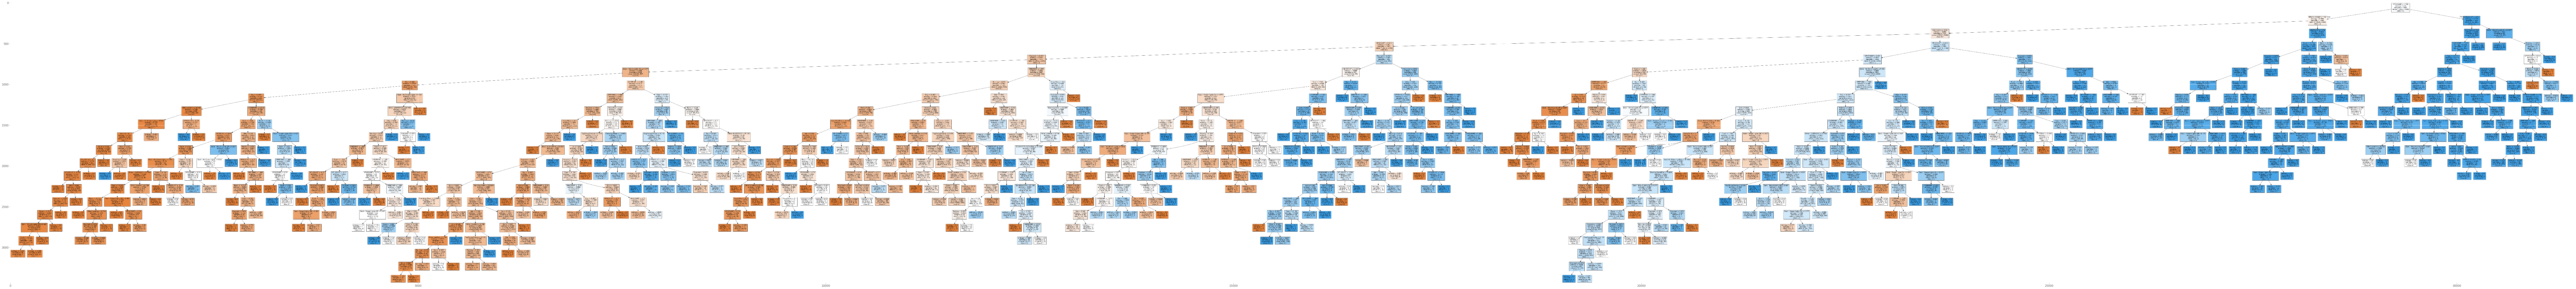

In [105]:
plt.rcParams["figure.figsize"] = (16,24)

#Visualise the decision tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "accident_tree.png"
featureNames = Feature.columns
targetNames = df_resampled["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(DT_model, feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(Y_train)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

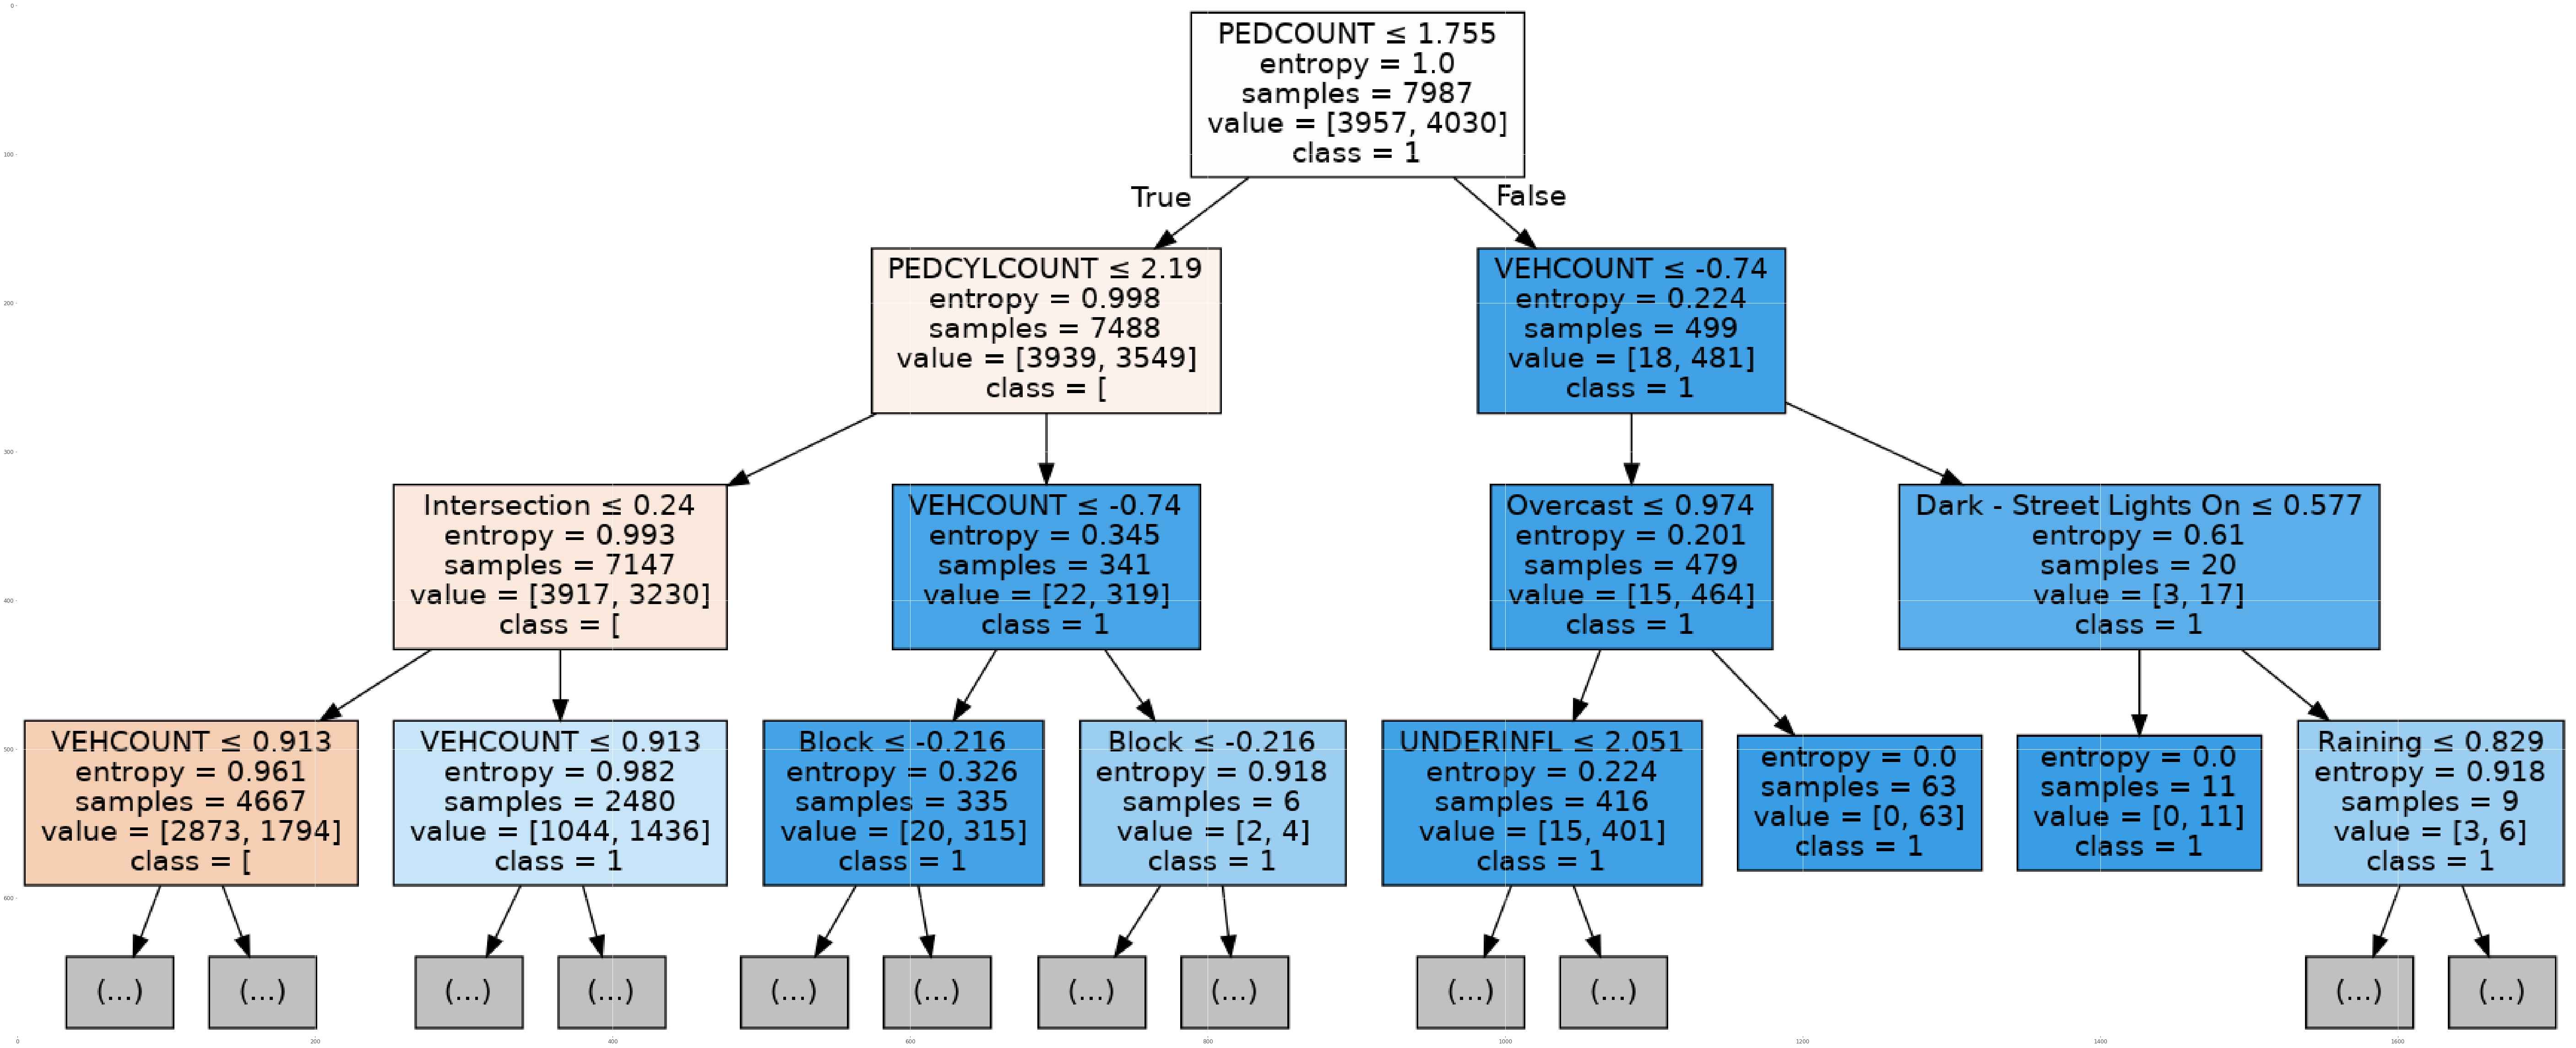

In [106]:
#Show only the first four layers of the decision tree
plt.rcParams["figure.figsize"] = (16,24)

#Visualise the decision tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "accident_tree.png"
featureNames = Feature.columns
targetNames = df_resampled["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(DT_model,max_depth=3, feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(Y_train)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[0.67 0.33]
 [0.37 0.63]]


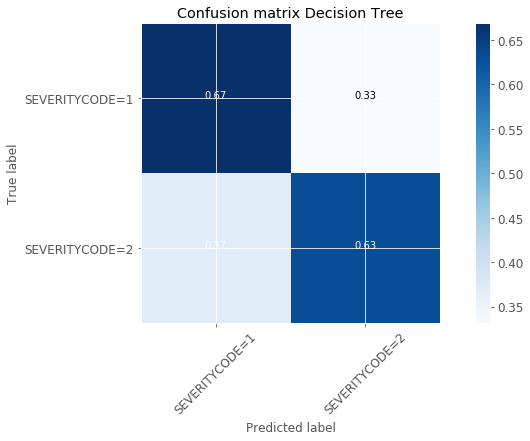

In [108]:
cnf_matrix = confusion_matrix(Y_test,DT_yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= True,  title='Confusion matrix Decision Tree')

# 2. Support Vector Machine (SVM)

In [109]:
from sklearn import svm
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [110]:

SVM_yhat = SVM_model.predict(X_test)

In [112]:
#Model evaluation
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy of SVM model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, SVM_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, SVM_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, SVM_yhat))
print("F1-score: %.2f" % f1_score(Y_test, SVM_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(SVM_yhat , Y_test) )
print(classification_report(Y_test, SVM_yhat))

Accuracy of SVM model:
Train set Accuracy:  0.6451734067860273
Test set Accuracy:  0.6400817995910021
Jaccard index: 0.64
F1-score: 0.64
R2-score: -0.46
              precision    recall  f1-score   support

           1       0.64      0.69      0.66      1748
           2       0.65      0.59      0.61      1675

   micro avg       0.64      0.64      0.64      3423
   macro avg       0.64      0.64      0.64      3423
weighted avg       0.64      0.64      0.64      3423



Normalized confusion matrix
[[0.69 0.31]
 [0.41 0.59]]


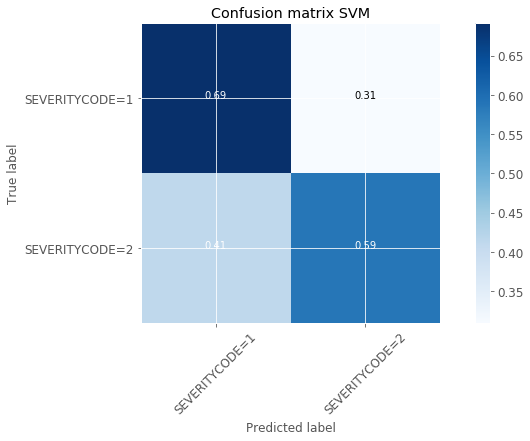

In [113]:
cnf_matrix = confusion_matrix(Y_test,SVM_yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= True,  title='Confusion matrix SVM')

# KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh
KNN_yhat = neigh.predict(X_test)
KNN_yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, KNN_yhat))

Train set Accuracy:  0.6566921247026418
Test set Accuracy:  0.6313175576979257


In [115]:
import math
math.sqrt(len(Y_test))

58.5064099052403

In [116]:
from sklearn.neighbors import KNeighborsClassifier
k = 57
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh
KNN_yhat = neigh.predict(X_test)
KNN_yhat[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, KNN_yhat))

Train set Accuracy:  0.6635783147614874
Test set Accuracy:  0.6397896581945661


In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 60
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    KNN_yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, KNN_yhat)

    
    std_acc[n-1]=np.std(KNN_yhat==Y_test)/np.sqrt(KNN_yhat.shape[0])

mean_acc
#print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

array([0.61, 0.59, 0.63, 0.61, 0.65, 0.64, 0.64, 0.63, 0.63, 0.63, 0.64,
       0.64, 0.64, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.64, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.64,
       0.64, 0.64, 0.65, 0.64, 0.64, 0.62, 0.64, 0.64, 0.64, 0.64, 0.64,
       0.64, 0.64, 0.64, 0.64])

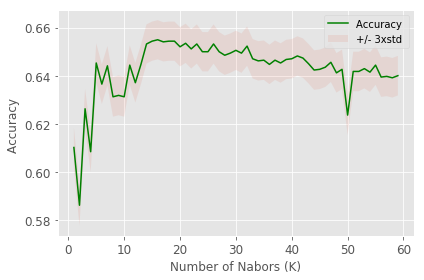

In [119]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [120]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6549810108092317 with k= 16


In [121]:
#Re-run the model with the best K  
print("Fitting with k="+str(mean_acc.argmax()+1))
KNN_model = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train,Y_train)
KNN_yhat = KNN_model.predict(X_test)  
KNN_model

Fitting with k=16


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [122]:
#Model evaluation

print("Accuracy of kNN model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, KNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, KNN_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, KNN_yhat))
print("F1-score: %.2f" % f1_score(Y_test, KNN_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(KNN_yhat , Y_test) )
print(classification_report(Y_test, KNN_yhat))

Accuracy of kNN model:
Train set Accuracy:  0.6640791285839489
Test set Accuracy:  0.6549810108092317
Jaccard index: 0.65
F1-score: 0.65
R2-score: -0.39
              precision    recall  f1-score   support

           1       0.65      0.69      0.67      1748
           2       0.66      0.62      0.64      1675

   micro avg       0.65      0.65      0.65      3423
   macro avg       0.66      0.65      0.65      3423
weighted avg       0.65      0.65      0.65      3423



Normalized confusion matrix
[[0.69 0.31]
 [0.38 0.62]]


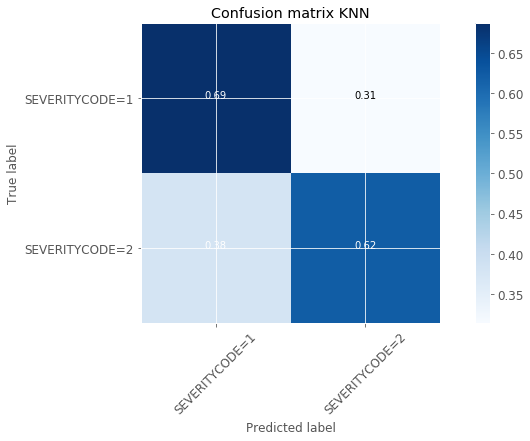

In [123]:
cnf_matrix = confusion_matrix(Y_test,KNN_yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= True,  title='Confusion matrix KNN')

  # Logistic Regression                 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [125]:
LR_yhat = LR.predict(X_test)

In [126]:
#Model evaluation
print("Accuracy of Logistic Regression model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, LR_yhat))
print("Jaccard index: %.2f" % jaccard_similarity_score(Y_test, LR_yhat))
print("F1-score: %.2f" % f1_score(Y_test, LR_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(LR_yhat , Y_test) )
print(classification_report(Y_test, LR_yhat))

Accuracy of Logistic Regression model:
Train set Accuracy:  0.6581945661700263
Test set Accuracy:  0.6435874963482325
Jaccard index: 0.64
F1-score: 0.64
R2-score: -0.43
              precision    recall  f1-score   support

           1       0.64      0.68      0.66      1748
           2       0.64      0.61      0.62      1675

   micro avg       0.64      0.64      0.64      3423
   macro avg       0.64      0.64      0.64      3423
weighted avg       0.64      0.64      0.64      3423



Normalized confusion matrix
[[0.68 0.32]
 [0.39 0.61]]


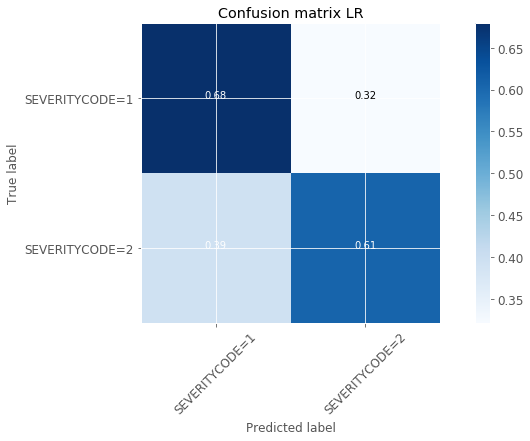

In [127]:
cnf_matrix = confusion_matrix(Y_test,LR_yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure(figsize=(10,6))
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= True,  title='Confusion matrix LR')

# Report

In [128]:

# Report with evaluation metrics

jaccard_KNN=jaccard_similarity_score(Y_test, KNN_yhat)
jaccard_tree=jaccard_similarity_score(Y_test, DT_yhat)
jaccard_SVM=jaccard_similarity_score(Y_test, SVM_yhat)
jaccard_LR=jaccard_similarity_score(Y_test, LR_yhat)

f1_KNN=f1_score(Y_test, KNN_yhat, average='weighted')
f1_tree=f1_score(Y_test, DT_yhat, average='weighted')
f1_SVM=f1_score(Y_test, SVM_yhat, average='weighted')
f1_LR=f1_score(Y_test, LR_yhat, average='weighted')

# Logloss for logistic regression
yhat_LR_prob = LR.predict_proba(X_test)
logloss_LR = log_loss(Y_test, yhat_LR_prob)


evaluation = {"Jaccard":[jaccard_KNN, jaccard_tree, jaccard_SVM, jaccard_LR], 
             "F1-score":[f1_KNN, f1_tree, f1_SVM, f1_LR],
             "Log Loss":["NA", "NA", "NA", logloss_LR] 
             }
eval_df = pd.DataFrame(evaluation, columns=["Jaccard", "F1-score", "Log Loss"], index=["KNN", "Decision Tree", "SVM", "Logistic Regression"])
eval_df.columns.name = "Algorithm"
eval_df

Algorithm,Jaccard,F1-score,Log Loss
KNN,0.654981,0.654585,NA
Decision Tree,0.649722,0.649583,NA
SVM,0.640082,0.639027,NA
Logistic Regression,0.643587,0.643076,0.604675
